In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir("C:\\New York City TLC")

In [4]:
df = pd.read_csv("C:\\New York City TLC\\2017_Yellow_Taxi_Trip_Data.csv", index_col = 0)


### Get information from the raw data
First, we need to explore the dataset to understand the structre, coulmns, size, descriptive statistics. Also, we can determine whther or not the further missing data handling, dealing with outliers and duplicates are required. 

In [5]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [6]:
df.shape

(22699, 17)

In [7]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 24870114 to 17208911
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               22699 non-null  int64  
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   passenger_count        22699 non-null  int64  
 4   trip_distance          22699 non-null  float64
 5   RatecodeID             22699 non-null  int64  
 6   store_and_fwd_flag     22699 non-null  object 
 7   PULocationID           22699 non-null  int64  
 8   DOLocationID           22699 non-null  int64  
 9   payment_type           22699 non-null  int64  
 10  fare_amount            22699 non-null  float64
 11  extra                  22699 non-null  float64
 12  mta_tax                22699 non-null  float64
 13  tip_amount             22699 non-null  float64
 14  tolls_amount           22699 non-null  float

In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [11]:
# Convert data columns to datetime

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

### Outliers
There is no missing and duplicated data. Let's visulize the data to check the outliers

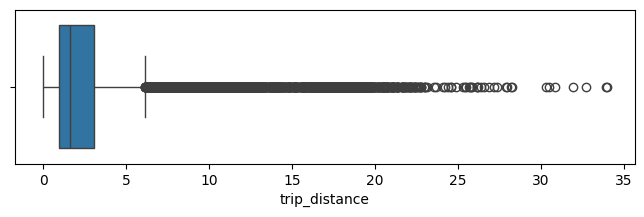

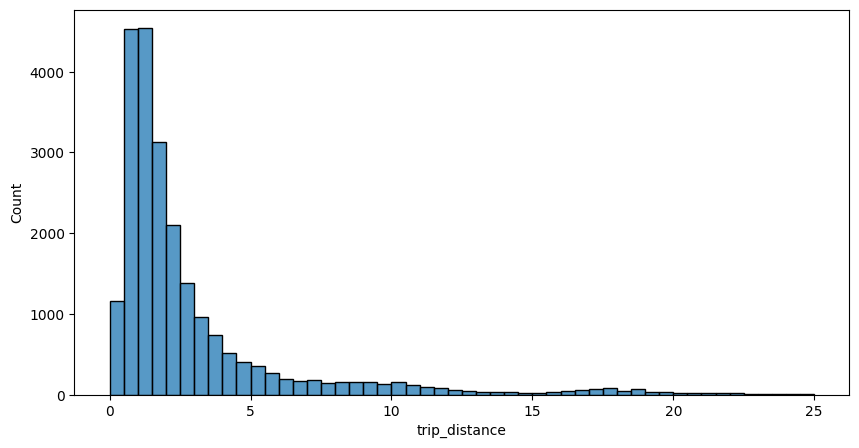

In [12]:
# Create box plot and histogram of trip_distance

fig = plt.figure(figsize=(8,2))
sns.boxplot(data=df, x='trip_distance');

fig = plt.figure(figsize=(10,5))
sns.histplot(data=df, x='trip_distance', binrange=(0,25), bins=50);

The majority of trips were journeys of less than two miles. The number of trips falls away steeply as the distance traveled increases beyond two miles.

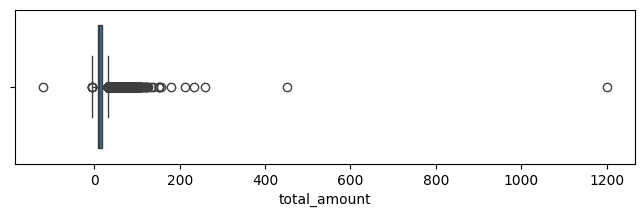

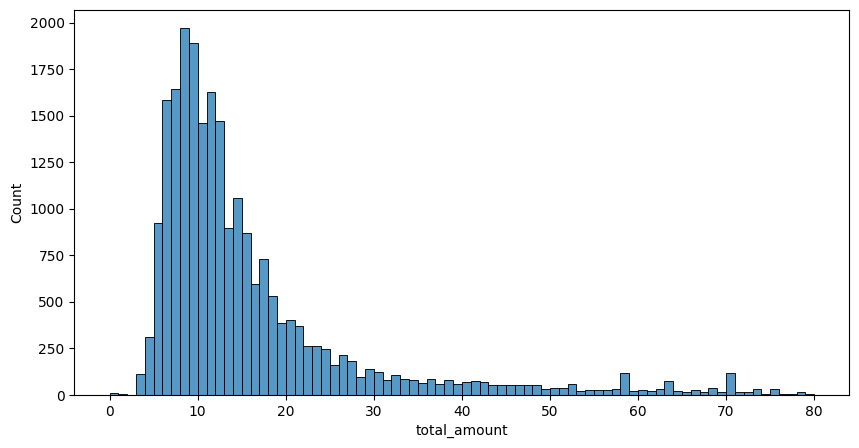

In [13]:
# Create box plot and histogram of total_amount


fig = plt.figure(figsize=(8,2))
sns.boxplot(data=df, x='total_amount');

fig = plt.figure(figsize=(10,5))
sns.histplot(data=df, x='total_amount', binrange=(0,80), bins=80);

The total cost of each trip also has a distribution that skews right, with most costs falling in the $5-15 range.

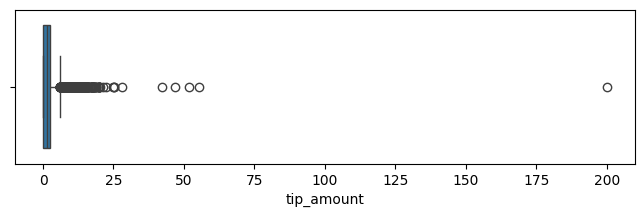

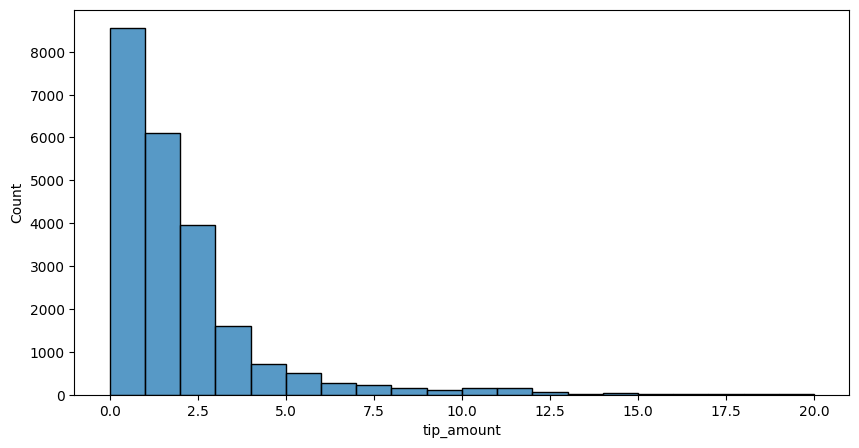

In [14]:
# Create box plot and histogram of tip_amount

fig = plt.figure(figsize=(8,2))
sns.boxplot(data=df, x='tip_amount');


fig = plt.figure(figsize=(10,5))
sns.histplot(data=df, x='tip_amount', binrange=(0,20), bins=20);

The distribution for tip amount is right-skewed, with nearly all the tips in the $0-3 range.

In [15]:
df['passenger_count'].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

There are 33 rides with zero passenger, which doesn't make sense. These would likely be dropped unless a reasonable explanation can be found for them.

In [16]:
mean_tip = df.groupby(by='passenger_count')[['tip_amount']].mean()
mean_tip

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


In [17]:
mean_tip.drop(mean_tip.index[0], inplace=True)

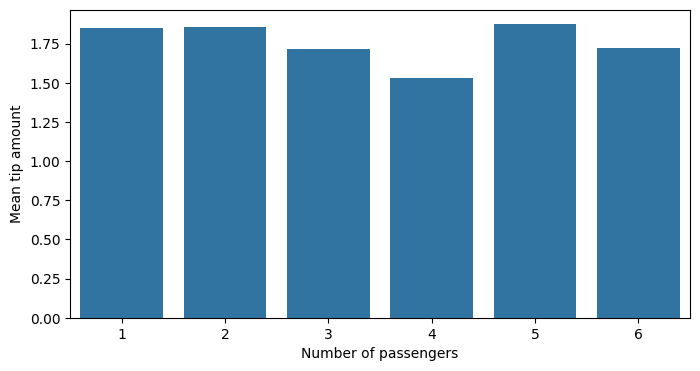

In [18]:
plt.figure(figsize=(8,4))

ax = sns.barplot(data=mean_tip, x=mean_tip.index, y='tip_amount');
ax.set_xlabel('Number of passengers');
ax.set_ylabel('Mean tip amount');

Mean tip amount varies very little by passenger count. Although it does drop noticeably for four-passenger rides, it's expected that there would be a higher degree of fluctuation because rides with four passengers were the least plentiful in the dataset

In [19]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name().str.slice(stop=3)

# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

In [20]:
monthly_rides = df['month'].value_counts()

In [21]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthly_rides = monthly_rides.reindex(months)
monthly_rides

Jan    1997
Feb    1769
Mar    2049
Apr    2019
May    2013
Jun    1964
Jul    1697
Aug    1724
Sep    1734
Oct    2027
Nov    1843
Dec    1863
Name: month, dtype: int64

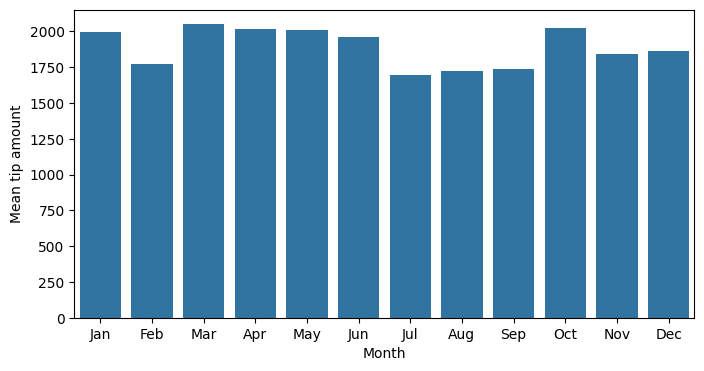

In [22]:
# Create a bar plot of total rides per month
plt.figure(figsize=(8,4))

ax = sns.barplot(x=monthly_rides.index, y=monthly_rides.values); 
ax.set_xlabel('Month');
ax.set_ylabel('Mean tip amount');

Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February.

In [23]:
daily_rides = df['day'].value_counts()

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

daily_rides = daily_rides.reindex(days)
daily_rides

Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: day, dtype: int64

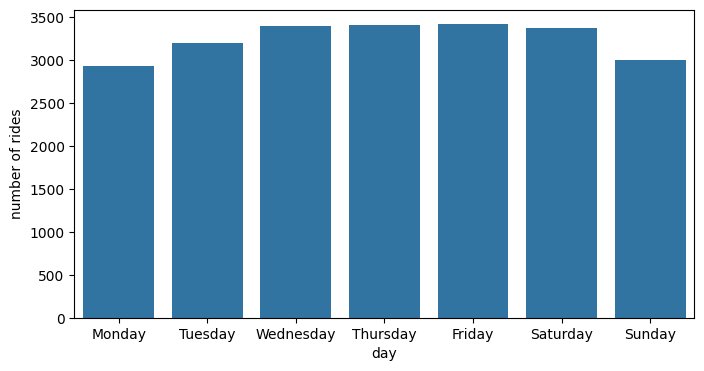

In [24]:
# Create bar plot for ride count by day

plt.figure(figsize=(8,4))
ax = sns.barplot(x=daily_rides.index, y=daily_rides);
ax.set_xlabel('day');
ax.set_ylabel('number of rides');

Suprisingly, Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.

In [25]:
total_amount_day = df.groupby('day').sum()[['total_amount']]
total_amount_day = total_amount_day.reindex(index=days)
total_amount_day

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


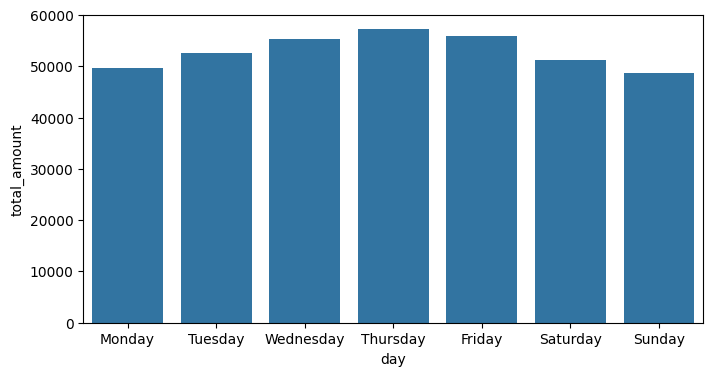

In [26]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'])


Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross revenue was ~$6,000 less than Thursday's—more than a 10% drop.

In [27]:
total_amount_month = df.groupby('month').sum()[['total_amount']]
total_amount_month = total_amount_month.reindex(index=months)
total_amount_month

,total_amount
month,
Jan,31735.25
Feb,28937.89
Mar,33085.89
Apr,32012.54
May,33828.58
Jun,32920.52
Jul,26617.64
Aug,27759.56
Sep,28206.38


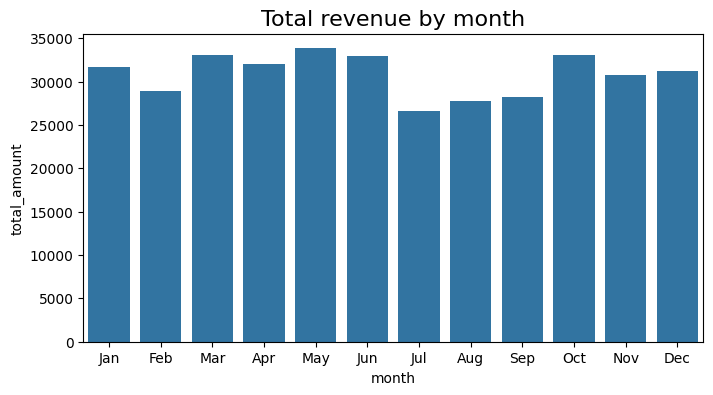

In [28]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'])
plt.title('Total revenue by month', fontsize=16);

Monthly revenue generally follows the pattern of monthly rides, with noticeable dips in the summer months of July, August, and September, and also one in February.

# A/B Test
we are willing to analyze the relationship between fare amount and payment type. Specifically, we want to find out wether or not paying the fare with card may result to a highr fare amount.


The purpose of this project is to demostrate knowledge of how to prepare, create, and analyze A/B tests. A/B test results should aim to find ways to generate more revenue for taxi cab drivers.

In [29]:
""" We are interested in the relationship between payment type and the fare amount the customer pays. 
    One approach is to look at the average fare amount for each payment type.""";

Payment_types = {1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute'}

mean_total_amount = df['fare_amount'].groupby(df['payment_type']).mean().reset_index()

# start indexing from 1 instead of 0 to be consistent with the int values of each payment_type
mean_total_amount.index = range(1, len(mean_total_amount)+1)

mean_total_amount['count'] = df['payment_type'].value_counts()

mean_total_amount['payment_type'] = mean_total_amount['payment_type'].replace(Payment_types)

mean_total_amount

,payment_type,fare_amount,count
1,Credit card,13.429748,15265
2,Cash,12.213546,7267
3,No charge,12.186116,121
4,Dispute,9.913043,46


Based on the averages shown, it appears that customers who pay in credit card tend to pay a larger fare amount than customers who pay in cash (or others). However, this difference might arise from random sampling, rather than being a true difference in fare amount. To assess whether the difference is statistically significant, we conduct a hypothesis test.

we aim to conduct an A/B test using a two-sample t-test with the significance level of %5.

`Null hypothesis`: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

`Alternative hypothesis`: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.


Note that we can assume the normal samples t-distribution are close to normal distribution since the number of samples are large. 

In [30]:
import scipy
scipy.stats.ttest_ind(df.loc[df['payment_type'] == 1, 'fare_amount'],
                      df.loc[df['payment_type'] == 2, 'fare_amount'],
                      equal_var=False)

Ttest_indResult(statistic=6.866800855655372, pvalue=6.797387473030518e-12)

p_value ~ 0 < 0.05. So, we can reject the null hypothesis and conclude that people pay more fare amount when the use credit cards.


The key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.

# Multiple linear regression model

In [31]:
from datetime import datetime
from datetime import date
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [32]:
df1 = df.copy()

Let's create a new column "duration" for the trips

In [33]:
df1['duration'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime'])/np.timedelta64(1,'m')

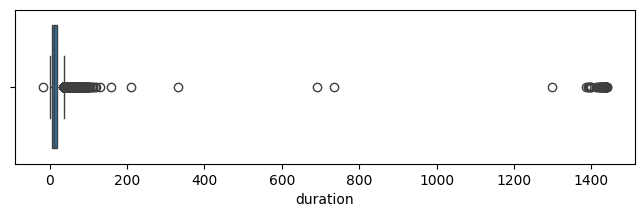

In [34]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df1['duration'])
plt.show();

Similar to trip distance and fare amount, duration of each trip includes outliers which may affect the model. 

In [35]:
sum(df1['trip_distance']==0)

148

There are 148 out of ~23,000 trips with zero distance. We can keep them as it's unlikely to have much of an effect on the model


First we must substitute the negative values with zero. However, Values of zero could be legitimate if the taxi logged a trip that was immediately canceled.


In [36]:
df1.loc[df1['fare_amount'] < 0, 'fare_amount'] = 0
df1['fare_amount'].min()

0.0

In [37]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df1.loc[df1[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df1[col].quantile(0.25)
        q3 = df1[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df1.loc[df1[col] > upper_threshold, col] = upper_threshold
        print(df1[col].describe())
        print()

In [38]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



In [39]:
outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



It is more usual to impute the Q3 + 1.5 * IQR as the high-value outliers. However, this does not seem appropriate for the duration and fare amount based on the data distribution. Thus, we specify the factor 6 instead of 1.5

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you do know to generalize about ones you do not know.

In this step, we create a column called mean_distance that captures the mean distance for each group of trips that share pickup and dropoff points.

We begin by creating a helper column called pickup_dropoff, which contains the unique combination of pickup and dropoff location IDs for each row.

In [40]:
# Create `pickup_dropoff` column
df1['pickup_dropoff'] = df1['PULocationID'].astype(str) + ' ' + df1['DOLocationID'].astype(str)
df1['pickup_dropoff'].head(2)

24870114    100 231
35634249     186 43
Name: pickup_dropoff, dtype: object

In [41]:
grouped = df1.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


In [42]:
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['trip_distance']

In [43]:
df1['mean_distance'] = df1['pickup_dropoff']

df1['mean_distance'] = df1['mean_distance'].map(grouped_dict)

# Check if it works
df1[(df1['PULocationID']==100) & (df1['DOLocationID']==231)][['mean_distance']]

,mean_distance
24870114,3.521667
96629892,3.521667
48945131,3.521667
50574134,3.521667
7282051,3.521667
49385419,3.521667


Repeat the process used to create the mean_distance column to create a mean_duration column.

In [44]:
grouped = df1.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df1['mean_duration'] = df1['pickup_dropoff']
df1['mean_duration'] = df1['mean_duration'].map(grouped_dict)

# Check if it works
df1[(df1['PULocationID']==100) & (df1['DOLocationID']==231)][['mean_duration']]

,mean_duration
24870114,22.847222
96629892,22.847222
48945131,22.847222
50574134,22.847222
7282051,22.847222
49385419,22.847222


In [45]:
df1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration,pickup_dropoff,mean_distance,mean_duration
24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,...,2.76,0.00,0.3,16.56,Mar,Saturday,14.066667,100 231,3.521667,22.847222
35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,...,4.00,0.00,0.3,20.80,Apr,Tuesday,26.500000,186 43,3.108889,24.470370
106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,...,1.45,0.00,0.3,8.75,Dec,Friday,7.200000,262 236,0.881429,7.250000
38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,...,6.39,0.00,0.3,27.69,May,Sunday,30.250000,188 97,3.700000,30.250000
30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,...,0.00,0.00,0.3,17.80,Apr,Saturday,16.716667,4 112,4.435000,14.616667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,...,0.00,0.00,0.3,5.80,Feb,Friday,3.266667,48 186,1.098214,8.594643
66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,...,14.64,5.76,0.3,73.20,Aug,Sunday,40.800000,132 164,18.757500,59.560417
74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,...,0.00,0.00,0.3,5.30,Sep,Monday,4.133333,107 234,0.684242,6.609091
60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,...,1.70,0.00,0.3,13.00,Jul,Saturday,11.933333,68 144,2.077500,16.650000


Create a binary rush_hour column that contains a 1 if the ride was during rush hour and a 0 if it was not.
#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [46]:
df1['rush_hour'] = df1['tpep_pickup_datetime'].dt.hour

df1.loc[df1['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [47]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [48]:
df1.loc[(df1.day != 'saturday') & (df1.day != 'sunday'), 'rush_hour'] = df1.apply(rush_hourizer, axis=1)
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,month,day,duration,pickup_dropoff,mean_distance,mean_duration,rush_hour
24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,...,0.0,0.3,16.56,Mar,Saturday,14.066667,100 231,3.521667,22.847222,1
35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,...,0.0,0.3,20.80,Apr,Tuesday,26.500000,186 43,3.108889,24.470370,0
106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,...,0.0,0.3,8.75,Dec,Friday,7.200000,262 236,0.881429,7.250000,1
38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,...,0.0,0.3,27.69,May,Sunday,30.250000,188 97,3.700000,30.250000,0
30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,...,0.0,0.3,17.80,Apr,Saturday,16.716667,4 112,4.435000,14.616667,0


Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

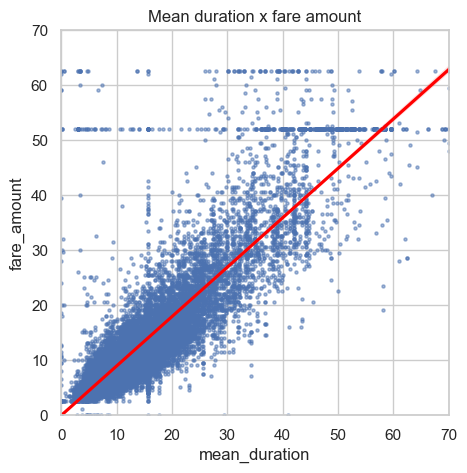

In [49]:
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df1['mean_duration'], y=df1['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

The `mean_duration` variable correlates with the target variable. The horizontal lines around fare amount of 63 dollars is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. 

In [50]:
df1[df1['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

There are 514 trips whose fares were \$52.

In [51]:
pd.set_option('display.max_columns', None)
df1[df1['fare_amount']==52].head(30)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration,pickup_dropoff,mean_distance,mean_duration,rush_hour
18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,Mar,Sunday,36.800000,236 132,19.211667,40.500000,1
47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,Jun,Saturday,66.850000,132 163,19.229000,52.941667,0
95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,Nov,Saturday,0.966667,132 132,2.255862,3.021839,0
103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,Dec,Wednesday,29.183333,132 79,19.431667,47.275000,0
80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,Sep,Sunday,29.483333,132 234,17.654000,49.833333,0
16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,Feb,Tuesday,39.833333,132 48,18.761905,58.246032,1
55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,Jun,Monday,15.616667,228 88,4.730000,15.616667,0
65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,Aug,Thursday,45.450000,132 48,18.761905,58.246032,0
80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,Sep,Tuesday,42.850000,186 132,17.096000,42.920000,0
33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,Apr,Sunday,71.583333,132 148,17.994286,46.340476,0


It seems that almost all of the trips in the first 30 rows where the fare amount was 52 dollar either begin or end at location 132, and all of them have a RatecodeID of 2. There is no readily apparent reason why PULocation 132 should have so many fares of 52 dollars. They seem to occur on all different days, at different times, with both vendors, in all months. However, there are many toll amounts of \$5.76 and \\$5.54. This would seem to indicate that location 132 is in an area that frequently requires tolls to get to and from. It's likely this is an airport.

In [52]:
#droping irrelevent and redundant features
df2 = df1.copy()

df2 = df2.drop([ 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 24870114 to 17208911
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


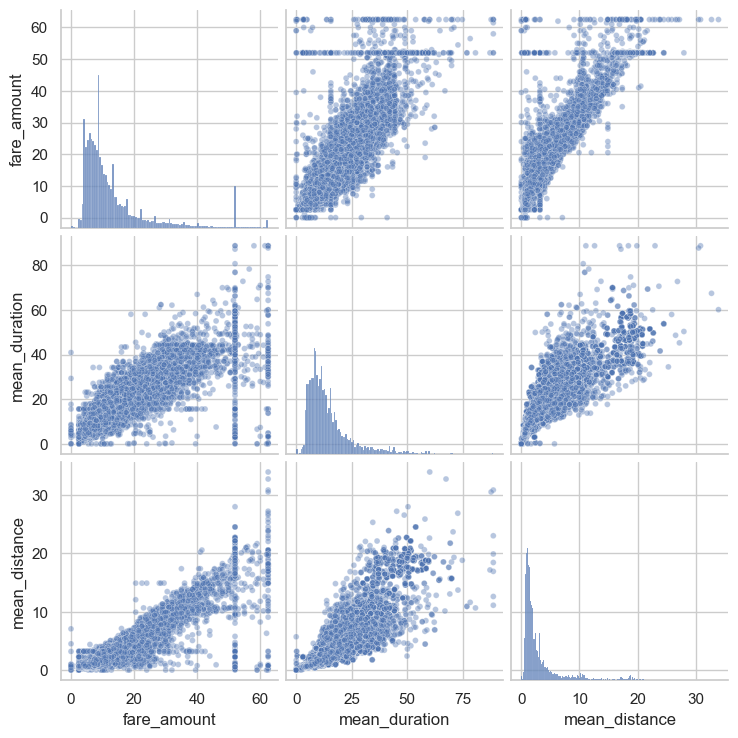

In [53]:
# visualize pairwise relationships between variables in the data
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

These variables all show linear correlation with each other.

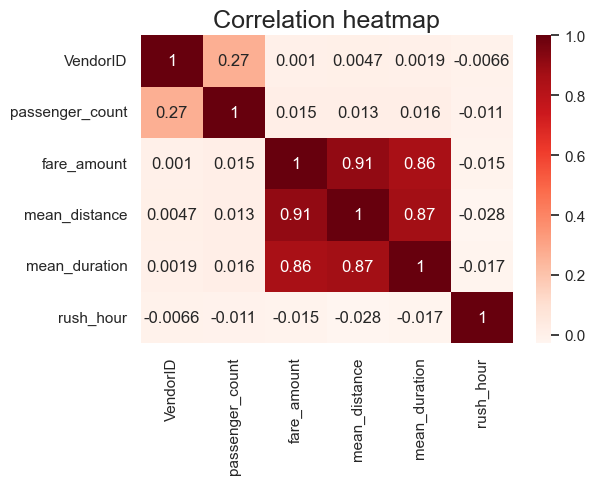

In [54]:
df2.corr(method='pearson')
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

`mean_duration` and `mean_distance` are both highly correlated with the target variable of `fare_amount` They're also both correlated with each other, with a Pearson correlation of 0.87.

Highly correlated predictor variables can be bad for linear regression models when you want to be able to draw statistical inferences about the data from the model. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about your data.

This model will predict `fare_amount`, which will be used as a predictor variable in machine learning models. Therefore, try modeling with both variables even though they are correlated.

In [55]:
X = df2.drop(columns=['fare_amount'])

y = df2[['fare_amount']]

X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
24870114,2,6,3.521667,22.847222,1
35634249,1,1,3.108889,24.470370,0
106203690,1,1,0.881429,7.250000,1
38942136,2,1,3.700000,30.250000,0
30841670,2,1,4.435000,14.616667,0


In [56]:
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
24870114,6,3.521667,22.847222,1,1
35634249,1,3.108889,24.470370,0,0
106203690,1,0.881429,7.250000,1,0
38942136,1,3.700000,30.250000,0,1
30841670,1,4.435000,14.616667,0,1


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.50301524  0.8694684   0.17616665 -0.79008842  0.89286563]
 [-0.50301524 -0.60011281 -0.69829589  1.26568112  0.89286563]
 [ 0.27331093 -0.47829156 -0.57301906 -0.79008842 -1.11998936]
 ...
 [-0.50301524 -0.45121122 -0.6788917  -0.79008842 -1.11998936]
 [-0.50301524 -0.58944763 -0.85743597  1.26568112 -1.11998936]
 [ 1.82596329  0.83673851  1.13212101 -0.79008842  0.89286563]]


In [59]:
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [60]:
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8397756706505115
R^2: 0.8397756706505115
MAE: 2.1892862517954073
MSE: 17.897304971443727
RMSE: 4.2305206501616


In [61]:
X_test_scaled = scaler.transform(X_test)

In [62]:
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8680947659893782
R^2: 0.8680947659893782
MAE: 2.135592265112351
MSE: 14.344244902931331
RMSE: 3.787379688245071


The model performance is high on both training and test sets, suggesting that there is little bias in the model and that the model is not overfit. In fact, the test scores were even better than the training scores.

In [63]:
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
102188254,14.0,12.375584,1.624416
50574134,28.0,16.336415,11.663585
14767643,5.5,6.745509,-1.245509
16019414,15.5,16.244218,-0.744218
1352127,9.5,10.554608,-1.054608


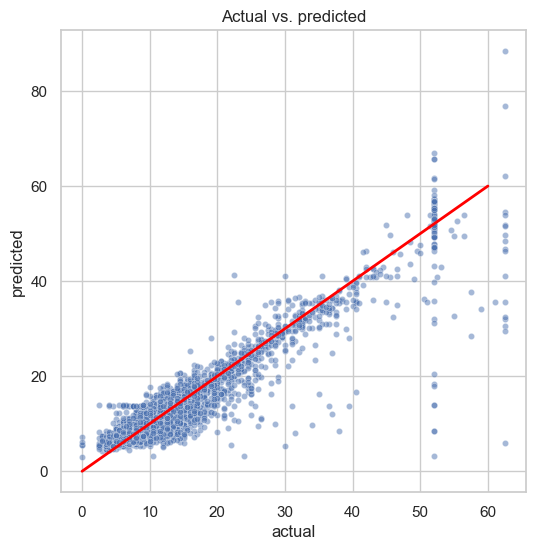

In [64]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

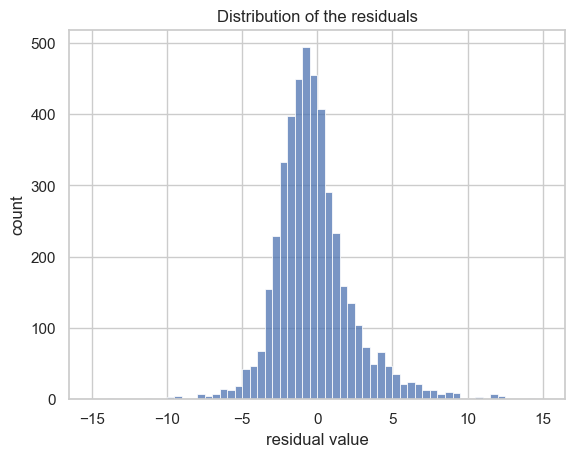

In [65]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [66]:
results['residual'].mean()

-0.015460834069770963

The distribution of the residuals is approximately normal and has a mean of -0.015. The residuals represent the variance in the outcome variable that is not explained by the model. A normal distribution around zero is good, as it demonstrates that the model's errors are evenly distributed and unbiased.

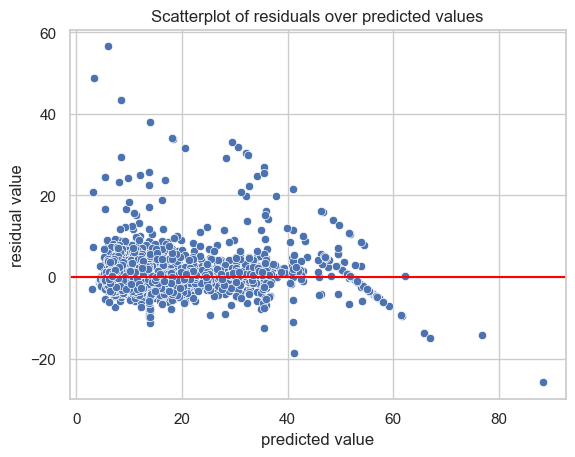

In [67]:
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

The model's residuals are evenly distributed above and below zero, with the exception of the sloping lines from the upper-left corner to the lower-right corner, which you know are the imputed maximum of $62.50 and the flat rate of $52 for JFK airport trips.

In [68]:
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.029178,7.127812,2.816191,0.067449,-0.053939


The coefficients reveal that `mean_distance` was the feature with the greatest weight in the model's final prediction. Be careful here! A common misinterpretation is that for every mile traveled, the fare amount increases by a mean of \\$7.13. This is incorrect. Remember, the data used to train the model was standardized with `StandardScaler()`. As such, the units are no longer miles. In other words, you cannot say "for every mile traveled...", as stated above. The correct interpretation of this coefficient is: controlling for other variables, *for every +1 change in standard deviation*, the fare amount increases by a mean of \\$7.13. 

Note also that because some highly correlated features were not removed, the confidence interval of this assessment is wider.

So, translate this back to miles instead of standard deviation (i.e., unscale the data). 

1. Calculate the standard deviation of `mean_distance` in the `X_train` data.

2. Divide the coefficient (7.133867) by the result to yield a more intuitive interpretation.

In [69]:
# 1. Calculate SD of `mean_distance` in X_train data
print(X_train['mean_distance'].std())

# 2. Divide the model coefficient by the standard deviation
print(7.133867 / X_train['mean_distance'].std())

3.574812975256436
1.9955916713344308


for every 3.57 miles traveled, the fare increased by a mean of \\$7.13. Or, reduced: for every 1 mile traveled, the fare increased by a mean of \\$2.00.

In [70]:
X_scaled = scaler.transform(X)
y_preds_full = lr.predict(X_scaled)

Some fares don't need to be predicted. They can simply be imputed based on their rate code. Specifically, all rate codes of 2 can be imputed with $52, as this is a flat rate for JFK airport.
Impute 52 at all predictions where RatecodeID is 2.

In [71]:

final_preds = df1[['RatecodeID']].copy()


final_preds['y_preds_full'] = y_preds_full

# Impute a prediction of 52 at all rows where RatecodeID == 2
final_preds.loc[final_preds['RatecodeID']==2, 'y_preds_full'] = 52


In [72]:
final_preds = final_preds['y_preds_full']
nyc_preds_means = df1[['mean_duration', 'mean_distance']].copy()
nyc_preds_means['predicted_fare'] = final_preds

## Machine learning models

**The purpose** of this model is to find ways to generate more revenue for taxi cab drivers.  
  
**The goal** of this model is to predict whether or not a customer is a generous tipper.  

In [73]:
# merging the original data with nyc_preds_means
df2 = df.join(nyc_preds_means)

In [74]:
df2.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,mean_duration,mean_distance,predicted_fare
24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,Mar,Saturday,22.847222,3.521667,16.588334
35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,Apr,Tuesday,24.470370,3.108889,16.074518
106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,Dec,Friday,7.250000,0.881429,6.970088
38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,30.250000,3.700000,18.756156
30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,Apr,Saturday,14.616667,4.435000,15.862593


In [75]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 24870114 to 17208911
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               22699 non-null  int64         
 1   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 3   passenger_count        22699 non-null  int64         
 4   trip_distance          22699 non-null  float64       
 5   RatecodeID             22699 non-null  int64         
 6   store_and_fwd_flag     22699 non-null  object        
 7   PULocationID           22699 non-null  int64         
 8   DOLocationID           22699 non-null  int64         
 9   payment_type           22699 non-null  int64         
 10  fare_amount            22699 non-null  float64       
 11  extra                  22699 non-null  float64       
 12  mta_tax                22699 non-null  float64    

Use a Boolean mask to filter df1 so it contains only customers who paid with credit card.

In [76]:
df3 = df2.copy()

mask = (df3['payment_type']==1)
df3 = df3[mask]

Add a `tip_percent` column to the dataframe by performing the following calculation:  
<br/>  


$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  

In [77]:
df3['tip_percent'] = df3['tip_amount']/(df3['total_amount']-df3['tip_amount'])
df3['tip_percent'] = df3['tip_percent'].round(decimals=3);
df3['tip_percent']

24870114     0.200
35634249     0.238
106203690    0.199
38942136     0.300
23345809     0.200
             ...  
60425673     0.200
67858616     0.200
66632549     0.250
60217333     0.150
17208911     0.199
Name: tip_percent, Length: 15265, dtype: float64

Now create another column called `generous`. This will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).


In [78]:
df3['generous'] = df3['tip_percent'].copy()
df3['generous'] = (df3['generous']>=0.200).astype(int)

In [79]:
df3['tpep_pickup_datetime'] = pd.to_datetime(df3['tpep_pickup_datetime'])
df3['tpep_dropoff_datetime'] = pd.to_datetime(df3['tpep_dropoff_datetime'])

In [80]:
df3['day'] = df3['tpep_pickup_datetime'].dt.day_name().str.lower()


In [81]:
 pick_up_hour = df3['tpep_pickup_datetime'].dt.hour

Next, engineer four new columns that represent time of day bins. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

In [82]:
# Create 'am_rush' col
df3['am_rush'] =  ((pick_up_hour >= 6) & (pick_up_hour < 10)).astype(int)

# Create 'daytime' col
df3['daytime'] =  ((pick_up_hour >= 10) & (pick_up_hour < 16)).astype(int)

# Create 'pm_rush' col
df3['pm_rush'] =  ((pick_up_hour >= 16) & (pick_up_hour < 20)).astype(int)

# Create 'nighttime' col
df3['nighttime'] =  ((pick_up_hour >= 20) | ((pick_up_hour >= 0) & (pick_up_hour < 6))).astype(int)

In [83]:
df3['month'] = df3['tpep_pickup_datetime'].dt.month_name().str.lower()

In [84]:
df3 = df3.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'payment_type', 'trip_distance', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge', 'total_amount', 'tip_percent'], axis=1)

In [85]:
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']


for c in cols_to_str:
    df3[c] = df3[c].astype('str')


In [86]:
df3 = pd.get_dummies(df3, drop_first=True)
df3.head()

,passenger_count,mean_duration,mean_distance,predicted_fare,generous,am_rush,daytime,pm_rush,nighttime,VendorID_2,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_99,PULocationID_10,PULocationID_100,PULocationID_106,PULocationID_107,PULocationID_112,PULocationID_113,PULocationID_114,PULocationID_116,PULocationID_12,PULocationID_123,PULocationID_125,PULocationID_127,PULocationID_128,PULocationID_129,PULocationID_13,PULocationID_130,PULocationID_131,PULocationID_132,PULocationID_133,PULocationID_134,PULocationID_135,PULocationID_137,PULocationID_138,PULocationID_140,PULocationID_141,PULocationID_142,PULocationID_143,PULocationID_144,PULocationID_145,PULocationID_146,PULocationID_148,PULocationID_151,PULocationID_152,PULocationID_153,PULocationID_158,PULocationID_161,PULocationID_162,PULocationID_163,PULocationID_164,PULocationID_166,PULocationID_17,PULocationID_170,PULocationID_173,PULocationID_179,PULocationID_181,PULocationID_186,PULocationID_188,PULocationID_189,PULocationID_190,PULocationID_193,PULocationID_196,PULocationID_208,PULocationID_209,PULocationID_211,PULocationID_213,PULocationID_216,PULocationID_218,PULocationID_223,PULocationID_224,PULocationID_225,PULocationID_226,PULocationID_229,PULocationID_230,PULocationID_231,PULocationID_232,PULocationID_233,PULocationID_234,PULocationID_236,PULocationID_237,PULocationID_238,PULocationID_239,PULocationID_24,PULocationID_243,PULocationID_244,PULocationID_246,PULocationID_247,PULocationID_249,PULocationID_25,PULocationID_255,PULocationID_256,PULocationID_258,PULocationID_260,PULocationID_261,PULocationID_262,PULocationID_263,PULocationID_264,PULocationID_265,PULocationID_28,PULocationID_33,PULocationID_35,PULocationID_36,PULocationID_37,PULocationID_4,PULocationID_40,PULocationID_41,PULocationID_42,PULocationID_43,PULocationID_45,PULocationID_48,PULocationID_49,PULocationID_50,PULocationID_52,PULocationID_57,PULocationID_61,PULocationID_62,PULocationID_65,PULocationID_66,PULocationID_68,PULocationID_7,PULocationID_70,PULocationID_74,PULocationID_75,PULocationID_79,PULocationID_80,PULocationID_82,PULocationID_87,PULocationID_88,PULocationID_90,PULocationID_91,PULocationID_92,PULocationID_93,PULocationID_95,PULocationID_97,DOLocationID_10,DOLocationID_100,DOLocationID_102,DOLocationID_106,DOLocationID_107,DOLocationID_11,DOLocationID_112,DOLocationID_113,DOLocationID_114,DOLocationID_116,DOLocationID_117,DOLocationID_118,DOLocationID_119,DOLocationID_12,DOLocationID_120,DOLocationID_121,DOLocationID_123,DOLocationID_124,DOLocationID_125,DOLocationID_126,DOLocationID_127,DOLocationID_129,DOLocationID_13,DOLocationID_130,DOLocationID_131,DOLocationID_132,DOLocationID_133,DOLocationID_134,DOLocationID_135,DOLocationID_136,DOLocationID_137,DOLocationID_138,DOLocationID_14,DOLocationID_140,DOLocationID_141,DOLocationID_142,DOLocationID_143,DOLocationID_144,DOLocationID_145,DOLocationID_146,DOLocationID_147,DOLocationID_148,DOLocationID_15,DOLocationID_151,DOLocationID_152,DOLocationID_153,DOLocationID_157,DOLocationID_158,DOLocationID_159,DOLocationID_16,DOLocationID_160,DOLocationID_161,DOLocationID_162,DOLocationID_163,DOLocationID_164,DOLocationID_166,DOLocationID_168,DOLocationID_169,DOLocationID_17,DOLocationID_170,DOLocationID_173,DOLocationID_174,DOLocationID_175,DOLocationID_177,DOLocationID_178,DOLocationID_179,DOLocationID_180,DOLocationID_181,DOLocationID_182,DOLocationID_183,DOLocationID_186,DOLocationID_188,DOLocationID_189,DOLocationID_19,DOLocationID_192,DOLocationID_193,DOLocationID_194,DOLocationID_195,DOLocationID_196,DOLocationID_197,DOLocationID_198,DOLocationID_200,DOLocationID_202,DOLocationID_208,DOLocationID_209,DOLocationID_21,DOLocationID_210,DOLocationID_211,DOLocationID_212,DOLocationID_213,DOLocationID_216,DOLocationID_217,DOLocationID_218,DOLocationID_22,DOLocationID_220,DOLocationID_223,DOLocationID_224,DOLocationID_225,DOLocationID_226,DOLocationID_228,DOLocationID_229,DOLocationID_23,DOLocationID_230,DOLocationID_231,DOLocationID_232,

In [87]:
(df3['generous']==1).value_counts(normalize=True)

True     0.526368
False    0.473632
Name: generous, dtype: float64

A little over half of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is very nearly balanced.

In [88]:
y = df3['generous']


x = df3.drop(columns='generous')

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42, stratify=y)

In [89]:
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay,\
RocCurveDisplay

In [90]:
# Random Forest
rf = RandomForestClassifier(random_state=42)

cv_params = {
    'max_depth':[None, 4, 6, 8],
    'max_features':['sqrt', None],
    'max_samples':[None, 0.8],
    'min_samples_leaf':[1, 5],
    'min_samples_split':[2, 5, 10],
    'n_estimators':[100, 200, 300]
            }

scoring = {'accuracy', 'precision', 'recall', 'f1'}

rf1 = GridSearchCV(estimator=rf, param_grid=cv_params, scoring=scoring, refit='f1', cv=5, return_train_score=True)

In [91]:
rf1.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 4, 6, 8],
                         'max_features': ['sqrt', None],
                         'max_samples': [None, 0.8], 'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             refit='f1', return_train_score=True,
             scoring={'accuracy', 'f1', 'recall', 'precision'})

In [92]:
rf1.best_params_

{'max_depth': 4,
 'max_features': 'sqrt',
 'max_samples': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 300}

In [93]:
rf1.best_score_

0.738817303446352

In [94]:
cv_results = rf1.cv_results_
cv_results['mean_train_recall']

array([0.99968896, 0.99968896, 0.99953344, 0.98802089, 0.98833242,
       0.99097664, 0.94944152, 0.9497528 , 0.95161917, 0.8164281 ,
       0.8140942 , 0.81378328, 0.8164281 , 0.8140942 , 0.81378328,
       0.8164281 , 0.8140942 , 0.81378328, 0.99968896, 0.99968896,
       0.99953344, 0.97246492, 0.97619851, 0.97495446, 0.9279732 ,
       0.93124023, 0.92890694, 0.8123831 , 0.81300591, 0.81285003,
       0.8123831 , 0.81300591, 0.81285003, 0.8123831 , 0.81300591,
       0.81285003, 0.99953344, 0.99953344, 0.99953344, 0.99082184,
       0.99377759, 0.99331042, 0.95161784, 0.95083963, 0.95068435,
       0.86807826, 0.86963407, 0.86885598, 0.86807826, 0.86963407,
       0.86885598, 0.86807826, 0.86963407, 0.86885598, 0.99813326,
       0.99922227, 0.99953344, 0.97277584, 0.97510865, 0.97510865,
       0.92859408, 0.92921725, 0.93030566, 0.84956472, 0.84909828,
       0.84925404, 0.84956472, 0.84909828, 0.84925404, 0.84956472,
       0.84909828, 0.84925404, 0.82887523, 0.82436197, 0.82358

In [95]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [96]:
def make_results_train(model_name:str, model_object, metric:str):


    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_train_f1
    recall = best_estimator_results.mean_train_recall
    precision = best_estimator_results.mean_train_precision
    accuracy = best_estimator_results.mean_train_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [97]:
results = make_results('RF CV', rf1, 'f1')
results

,model,precision,recall,F1,accuracy
0,RF CV,0.674421,0.817041,0.738817,0.696037


In [98]:
results_train = make_results_train('RF Train', rf1, 'f1')
results_train

,model,precision,recall,F1,accuracy
0,RF Train,0.680637,0.821562,0.744478,0.703161


In [99]:
preds = rf1.best_estimator_.predict(x_test)

In [100]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [101]:
rf_test_scores = get_test_scores('RF test', preds, y_test)
rf_test_scores

,model,precision,recall,F1,accuracy
0,RF test,0.688335,0.825296,0.750619,0.711349


In [102]:
results = pd.concat([results_train, results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF Train,0.680637,0.821562,0.744478,0.703161
0,RF CV,0.674421,0.817041,0.738817,0.696037
0,RF test,0.688335,0.825296,0.750619,0.711349


In [112]:
#XGBoost
xgb = xgboost.XGBClassifier(objective="binary:logistic", random_state=0)


param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [4, 6],
    'min_child_weight': [2, 4],
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2]
}


scoring = {'accuracy', 'precision', 'recall', 'f1'}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring=scoring, refit='f1', return_train_score=True)

In [113]:
xgb1 = grid_search.fit(x_train, y_train)

In [114]:
print(f"Best score: {xgb1.best_score_}")

Best score: 0.7358856769381067


In [115]:
print(f"Best parameters: {xgb1.best_params_}")

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 200}


In [116]:
results_XGBoost = make_results('XGBoost CV', xgb1, 'f1')
results_XGBoost

,model,precision,recall,F1,accuracy
0,XGBoost CV,0.685461,0.794638,0.735886,0.699965


In [117]:
results_XGBoost_train = make_results_train('XGBoost Train', xgb1, 'f1')
results_XGBoost_train

,model,precision,recall,F1,accuracy
0,XGBoost Train,0.696537,0.806938,0.747675,0.713315


In [118]:
xgb_preds = xgb1.best_estimator_.predict(x_test)
xgb_test_scores = get_test_scores('XGB test', xgb_preds, y_test)
results = pd.concat([results, results_XGBoost_train, results_XGBoost, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF Train,0.680637,0.821562,0.744478,0.703161
0,RF CV,0.674421,0.817041,0.738817,0.696037
0,RF test,0.688335,0.825296,0.750619,0.711349
0,XGBoost Train,0.696537,0.806938,0.747675,0.713315
0,XGBoost CV,0.685461,0.794638,0.735886,0.699965
0,XGB test,0.692512,0.811450,0.747278,0.711104


Based on the final scores, both models performance are very close. Random forest performs a little better and can be choosen as the final model with an acceptable accuracy.
Training deep Neural networks can be interesting alternatives to be compared to tree-based models. In the next projects, we aim to do so.

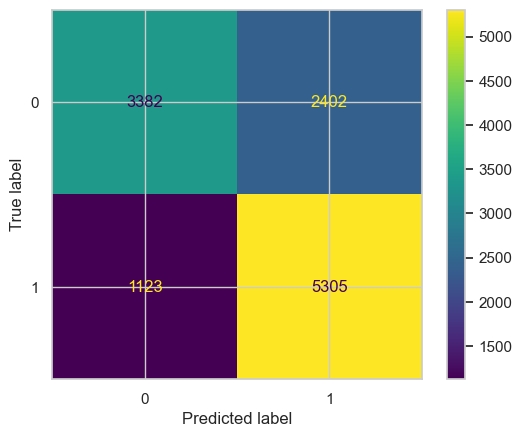

In [119]:
cm = confusion_matrix(y_test, preds, labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_, 
                             )
disp.plot(values_format='');

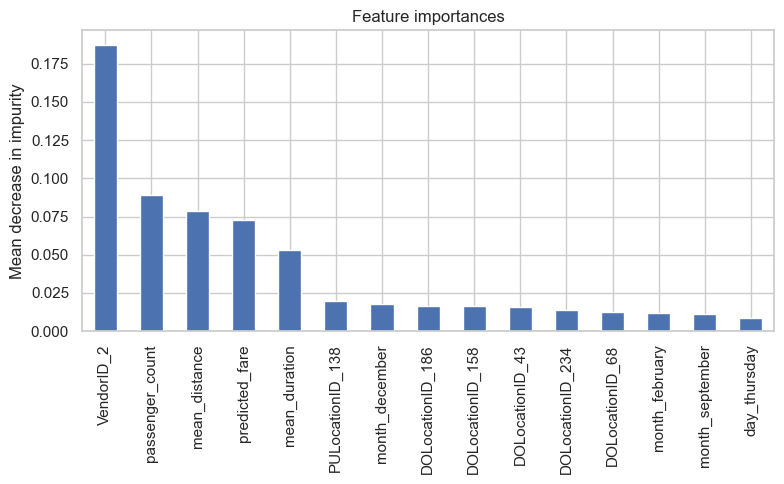

In [120]:
importances = rf1.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=x_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();